# Graph3: Wie viel Auswahl die Kantone erlauben

Das Skript schaut welche Leistungen die Kantone Bern, Solothurn und Freiburg nur im Kanton zulassen.
Dabei interessiert uns bei welchen Leistungen sie Überschneidungen zulassen - so dass Patientinnen zwischen Spitälern innerhalb- und ausserhalb des Kantons auswählen können - und bei welchen Leistungen Patienten sich nur ausserhalb des jeweiligen Kantons behandeln lassen können.

Zwischenschritt: Damit die Zahl der Leistungen pro Kanton, bzw Spital vergleichbar sind habe ich von kanton_0.csv zu kanton_1.csv bei Solothurn und Freiburg manuell die Leistungen harmonisiert. So hat Solothurn zum Beispiel alle Transplantationen zusammengefasst, während sie bei Bern einzeln aufgelistet waren. Als Referenz habe ich Bern verwendet, weil diese Leistungsliste am detailiertesten war.

Das Skript öffnet die Kantons-CSVs und 
- Fügt eine Spalte mit der Kennzeichnung des Spitals aus Sicht des Kantons ein (Wird die Leistung im Kanton, nur ausserhalb oder sowohl innerhalb als ausserhalb des Kantons angeboten?)
- Hängt die DFs zusammen
- rechnet Prozente aus, wie viele Leistungen pro Kanton innerhalb, ausserhalb oder sowohl als auch zugelassen sind
- Macht ein stacked bar graph draus.

In [28]:
# Import stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

### CSV laden für Freiburg

In [36]:
df_fr = pd.read_csv('exports/freiburg_1.csv')


#### Summe über einzelne Spalten einer Zeile

Nun will ich die Summe pro Zeile über bestimmte Spalten ausrechnen. Dafür erstelle ich entsprechende Listen mit den Spaltennamen.

In [4]:
# Listen mit Spaltennamen
fr_headers = df_fr.columns.tolist()
fr_innerkantonal = fr_headers[3:8]
fr_ausserkantonal = fr_headers[8:13]

# Neue Spalten mit Summe aus den Listen erstellen
df_fr['Innerkantonal'] = df_fr[fr_innerkantonal].sum(axis=1)
df_fr['Ausserkantonal'] = df_fr[fr_ausserkantonal].sum(axis=1)
#df_fr.head(2)

In [5]:
#Mit einer Funktion teile ich die Leistungen danach ein ob sie nur im Kanton, 
#nur ausserhalb oder sowohl als auch angeboten werden. 

def kennzeichen(innerkantonal, ausserkantonal):
    if innerkantonal >0 and ausserkantonal > 0:
        return 'beides'
    elif innerkantonal == 0 and ausserkantonal > 0:
        return 'AK'
    elif innerkantonal >0 and ausserkantonal == 0:
        return 'IK'
    else:
        return 'hoppla'
    

df_fr['Kennzeichen FR'] = df_fr.apply(lambda x: kennzeichen(x['Innerkantonal'], x['Ausserkantonal']), axis=1)
df_fr.head(2)

,Leistungsbereiche,Kürzel Bern,Leistungsgruppen,HFR,Daler,Clinique Générale,HIB,Petit Prince,HNE,Klinik Bethesda,CHUV,Inselspital,HUG,Innerkantonal,Ausserkantonal,Kennzeichen FR
0,Basispaket,BP,Basispaket Chirurgie und Innere Medizin,1,1,0,1,0,0,0,0,0,0,3,0,IK
1,Programmiertes \nBasispaket,BPE,Basispaket für elektive Leistungserbringer,1,1,1,1,0,0,0,0,0,0,4,0,IK


### Solothurn

In [35]:
# csv laden:
df_so = pd.read_csv('exports/solothurn_1.csv')

In [7]:
#print(list(df_so.columns))

In [8]:
# Listen mit Spaltennamen
so_headers =df_so.columns.tolist()

In [9]:
#listen definieren
so_innerkantonal = so_headers[3:6]
so_ausserkantonal = so_headers[6:17]

# Neue Spalten mit Summe aus den Listen erstellen
df_so['Innerkantonal'] = df_so[so_innerkantonal].sum(axis=1)
df_so['Ausserkantonal'] = df_so[so_ausserkantonal].sum(axis=1)
#df_so.head(2)

In [10]:
def kennzeichen(innerkantonal, ausserkantonal):
    if innerkantonal >0 and ausserkantonal > 0:
        return 'beides'
    elif innerkantonal == 0 and ausserkantonal > 0:
        return 'AK'
    elif innerkantonal >0 and ausserkantonal == 0:
        return 'IK'
    else:
        return 'AK' # <- Zwei Zeilen sind leer. Das ist schon im PDF der Spitalliste von Solothurn so. 
                    # Ich werte sie als ausserkantonal, weil es dafür innerhalb von Solothurn offenbar kein 
                    # Angebot gibt.
    

df_so['Kennzeichen SO'] = df_so.apply(lambda x: kennzeichen(x['Innerkantonal'], x['Ausserkantonal']), axis=1)
df_so.head(2)

,Leistungsbereiche,Kürzel,Leistungsgruppen,Pallas Kliniken AG,Privatklinik Obach,Solothurner Spitäler AG,Engeriedspital (Lindenhofgruppe),Hirslanden Klinik Aarau,Inselspital Bern (Insel Gruppe AG),Kantonsspital Aarau,Kantonsspital Baselland,Klinik Beau-Site (Hirslanden Bern AG),Lindenhofspital (Lindenhofgruppe),Salem-Spital (Hirslanden Bern AG),St. Claraspital AG,Universitäts-Kinderspital beider Basel,Universitätsspital Basel,Innerkantonal,Ausserkantonal,Kennzeichen SO
0,Basispaket,BP,Basispaket Chirurgie und Innere Medizin,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,2,beides
1,NaN,BPE,Basispaket für elektive Leistungserbringer,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,IK


### Bern

In [32]:
df_be = pd.read_csv('exports/bern_1.csv')
#print(list(df_be.columns))

In [16]:
be_headers = df_be.columns.tolist()

In [17]:
be_innerkantonal = be_headers[4:33]
be_ausserkantonal = be_headers[33:38]
df_be['Innerkantonal'] = df_be[be_innerkantonal].sum(axis=1)
df_be['Ausserkantonal'] = df_be[be_ausserkantonal].sum(axis=1)

In [18]:
def kennzeichen(innerkantonal, ausserkantonal):
    if innerkantonal >0 and ausserkantonal > 0:
        return 'beides'
    elif innerkantonal == 0 and ausserkantonal > 0:
        return 'AK'
    elif innerkantonal >0 and ausserkantonal == 0:
        return 'IK'
    else:
        return 'AK' #<- diese Werte betreffen alle hochspezialisierte Leistungen. Diese können offenbar nicht
                    # in Bern angeboten werden, aber durch ein Konkordat des Bundes können Patienten in jedes 
                    # Spital, welches die Leistungen anbietet. Deshalb werte ich sie hier als AK.
    

df_be['Kennzeichen BE'] = df_be.apply(lambda x: kennzeichen(x['Innerkantonal'], x['Ausserkantonal']), axis=1)
df_be.head(2)

,Hauptbereiche,Leistungsbereiche,Kürzel,Leistungsgruppen,"Insel, Insel Gruppe AG","Tiefenau, Insel Gruppe AG","Münsingen, Insel Gruppe AG","Aarberg, Insel Gruppe AG","Riggisberg, Insel Gruppe AG","Beau-Site, Hirslanden Bern AG",...,"St-Imier, Hôpital du Jura bernois SA","Moutier, Hôpital de Moutier SA","Delémont, Hôpital du Jura SA","Bürger- spital Solothurn, SoH AG","Fond. ""La Chrysalide"", Hôpital neuchâtelois","Pourtalès, Hôpital neuchâtelois","La-Chaux-de- Fonds, Hôpital neuchâtelois",Innerkantonal,Ausserkantonal,Kennzeichen BE
0,Basis,Basispaket,BP,Basispaket Chirurgie und Innere Medizin,1,1,1,1,1,1,...,1,1,1,1,0,1,1,24,4,beides
1,Basis,Basispaket,BPE,Basispaket für elektive Leistungserbringer,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,IK


### Spalten Mergen

In [19]:
df_be_cut = df_be[['Leistungsgruppen', 'Kennzeichen BE']]
df_so_cut = df_so[['Leistungsgruppen', 'Kennzeichen SO']]
df_fr_cut = df_fr[['Leistungsgruppen', 'Kennzeichen FR']]

In [20]:
df_all = df_be_cut.merge(df_so_cut, left_on='Leistungsgruppen', right_on='Leistungsgruppen')
df_all = df_all.merge(df_fr_cut, left_on='Leistungsgruppen', right_on='Leistungsgruppen')
df_all.tail(2)

,Leistungsgruppen,Kennzeichen BE,Kennzeichen SO,Kennzeichen FR
135,Spezialisierte Pallitaive Care im Spital,beides,beides,IK
136,Akutsomatische Versorgung Abhängigkeitskranker,beides,beides,IK


### Daten visualisieren

In [21]:
# Neues DF mit value_counts

count_be = df_all['Kennzeichen BE'].value_counts().reset_index().sort_values(by='index')
count_so = df_all['Kennzeichen SO'].value_counts().reset_index().sort_values(by='index')
count_fr = df_all['Kennzeichen FR'].value_counts().reset_index().sort_values(by='index')

In [22]:
df_count = count_be.merge(count_so, left_on='index', right_on='index')
df_count = df_count.merge(count_fr, left_on='index', right_on='index')
df_count=df_count.set_index('index')
df_count_t =df_count.T
df_count_t

index,AK,IK,beides
Kennzeichen BE,6,94,37
Kennzeichen SO,53,2,82
Kennzeichen FR,28,76,33


#### Plot

<function matplotlib.pyplot.show(*args, **kw)>

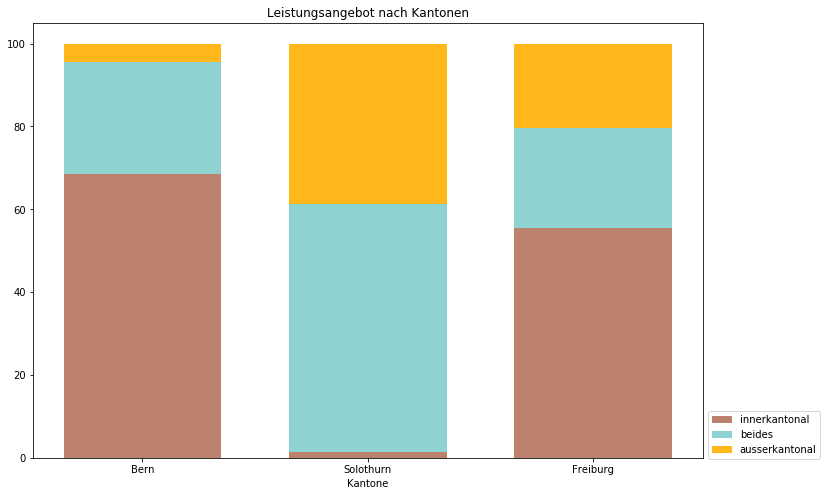

In [27]:
#Data
r = [0,1,2]
#raw_data = {'Kennzeichen BE': [68,4,27], 'Kennzeichen SO': [38,1,60],'Kennzeichen FR': [55,20,24],}
df= df_count_t

totals = [i+j+k for i,j,k in zip(df['AK'], df['IK'], df['beides'])]
ik = [i/j * 100 for i,j in zip(df['IK'], totals)]
beides = [i/j * 100 for i,j in zip(df['beides'], totals)]
ak = [i/j * 100 for i,j in zip(df['AK'], totals)]

plt.figure(figsize=(12,8)) 
#plot
barWidth = 0.7
names = ('Bern','Solothurn','Freiburg')
#Innerkantonal, unten
p_ik = plt.bar(r, ik, color='#bc826e',  width=barWidth, label='innerkantonal')
#Beides, mitte
p_beides= plt.bar(r, beides, bottom=ik, color='#8ed2d1', width=barWidth, label='beides')
#Auserkantonal, oben
p_ak= plt.bar(r, ak, bottom=[i+j for i, j in zip(ik, beides)], color='#FFB71C', width=barWidth, label='ausserkantonal')


plt.legend(handles=[p_ik, p_beides, p_ak])
plt.legend(loc='best', bbox_to_anchor=(1, 0.12))
plt.xticks(r, names)
plt.xlabel("Kantone")
plt.title('Leistungsangebot nach Kantonen')

plt.show
# Farben
# echte Daten

In [24]:
# Für den Fliesstext hier die Prozentangaben einzeln

df_count['BE %'] = (df_count['Kennzeichen BE']/df_count['Kennzeichen BE'].sum()*100).round(1)
df_count['SO %'] = (df_count['Kennzeichen SO']/df_count['Kennzeichen SO'].sum()*100).round(1)
df_count['FR %'] = (df_count['Kennzeichen FR']/df_count['Kennzeichen SO'].sum()*100).round(1)
df_count

,Kennzeichen BE,Kennzeichen SO,Kennzeichen FR,BE %,SO %,FR %
index,,,,,,
AK,6,53,28,4.4,38.7,20.4
IK,94,2,76,68.6,1.5,55.5
beides,37,82,33,27.0,59.9,24.1
